## Importing libraries and Installing packages


In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install keras_preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from numpy import array
import tensorflow as tf
from keras.preprocessing.text import one_hot, Tokenizer
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras_preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from matplotlib import pyplot as plt
import seaborn as sn

## Loading dataset

In [ ]:
imdb_dataset = pd.read_csv("IMDB Dataset.csv")
print("Shape of training data = ", imdb_dataset.shape)
imdb_dataset.sample(10)

Shape of training data =  (50000, 2)


,review,sentiment
4239,"""The Foreigner"" is a tale of foreign intrigue ...",negative
35326,This is a smart drama about the way of life in...,positive
10041,I wasn't expecting much from this tale of a ki...,positive
42426,"I love movies, and I'll watch any movie all th...",negative
37515,This is an interesting series that takes real ...,positive
42204,Had the original casting idea been kept (hunti...,negative
17330,"I give this a generous four out of ten stars, ...",negative
5941,We have a character named Evie. Evie just want...,positive
44057,Why Panic never got a good theatrical release ...,positive
8519,Once again Mr. Costner has dragged out a movie...,negative


In [ ]:
# Checking for missing values

imdb_dataset.isnull().values.any()

False

<Axes: xlabel='sentiment', ylabel='count'>

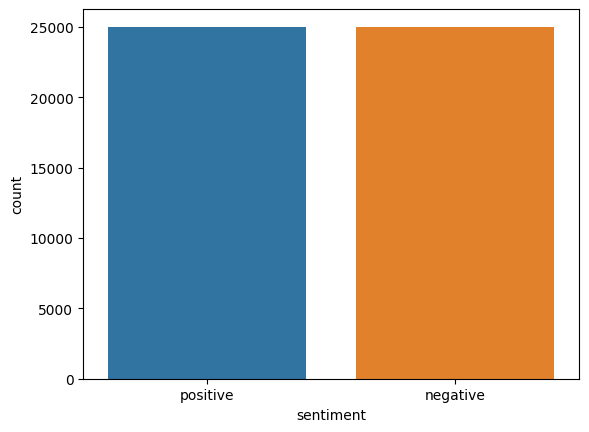

In [ ]:
# Observing class balance

import seaborn as sns
sns.countplot(x='sentiment', data=imdb_dataset)

## Data Preprocessing

In [ ]:
# Cleaning the data and remmoving unnecessary stuff

def preprocess_text(sen):

    # Lowercasing sentence
    sentence = sen.lower()

    # Removing html tags
    TAG_RE = re.compile(r'<[^>]+>')
    sentence = TAG_RE.sub('', sentence)

    # Removing punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Removing single character 
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence) 

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)  

    # Removing Stopwords
    # pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
    # sentence = pattern.sub('', sentence)

    return sentence

imdb_dataset['cleaned_review'] = imdb_dataset['review'].apply(preprocess_text)  
imdb_dataset.sample(10)

,review,sentiment,cleaned_review
3749,Rating: 4 out of 10<br /><br />As this mini-se...,negative,rating out of as this mini series approached a...
1470,"36. THE HOSPITAL (comedy, 1971) A series of em...",positive,the hospital comedy series of emergencies has...
13825,"Bathebo, you big dope.<br /><br />This is the ...",negative,bathebo you big dope this is the worst piece o...
43785,No surprise except in how quickly ABC reacted ...,negative,no surprise except in how quickly abc reacted ...
41658,This is a unique and bold film. It's energetic...,positive,this is unique and bold film it energetic with...
34803,"Wow, I forgot how great this movie was until I...",positive,wow forgot how great this movie was until stum...
43916,The people who are praising this film are the ...,negative,the people who are praising this film are the ...
37858,Not often it happens that a great director´s l...,positive,not often it happens that great director last ...
46053,I agree that this film was spectacular. The wa...,positive,i agree that this film was spectacular the way...
16478,Writer/Director Bart Sibrel bases his work her...,negative,writer director bart sibrel bases his work her...


In [ ]:
# Label Binarization -> postive=1, negative=0

imdb_dataset['binary_sentiment']=imdb_dataset['sentiment'].apply(lambda x: 1 if x=='positive' else 0)
imdb_dataset.sample(10)

,review,sentiment,cleaned_review,binary_sentiment
3939,Warning: Spoilers Galore!<br /><br />Tim Burto...,negative,warning spoilers galore tim burton remaking th...,0
729,Some may go for a film like this but I most as...,negative,some may go for film like this but most assure...,0
30126,Going into seeing this movie I was a bit skept...,positive,going into seeing this movie was bit skeptical...,1
24348,"In the 60's, having as the background the rehe...",negative,in the having as the background the rehearsal ...,0
13820,This movie wasn't too funny. It wasn't too hor...,negative,this movie wasn too funny it wasn too horrible...,0
44051,"Now the television schedules (in England, at l...",negative,now the television schedules in england at lea...,0
23299,"The words ""Swedish"" and ""Action movie"" do not ...",negative,the words swedish and action movie do not mix ...,0
6794,I probably have to blame myself but I sure as ...,negative,i probably have to blame myself but sure as he...,0
47770,This is one of the worst movies I've seen in a...,negative,this is one of the worst movies ve seen in whi...,0
44636,I just watched Holly along with another movie ...,positive,i just watched holly along with another movie ...,1


In [ ]:
X=imdb_dataset['cleaned_review'].values
Y=imdb_dataset['binary_sentiment'].values

In [ ]:
# Splitting our dataset into train(80%) and test(20%)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
print(Y_train.shape)
print(Y_test.shape)

(40000,)
(10000,)


In [ ]:
# Using TF-IDF to convert text to features

from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer()
X_train_tfidf = tf_idf.fit_transform(X_train)  #fitting on X_train and then transforming X_train
X_test_tfidf = tf_idf.transform(X_test)  #transforming X_test

## Training with Naive Bayes 

In [ ]:
# Model Training

from sklearn import naive_bayes
nb = naive_bayes.MultinomialNB()
nb.fit(X_train_tfidf, Y_train)

MultinomialNB()

In [ ]:
# Model Performance

from sklearn.metrics import f1_score

Y_pred = nb.predict(X_test_tfidf)
nb_f1_score = f1_score(Y_test, Y_pred)

print('F1 Score using Naive Bayes:', nb_f1_score)

F1 Score using Naive Bayes: 0.8614445574771108


## Training with Logistic Regression

In [ ]:
# Model Training

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_tfidf, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Model Performance

from sklearn.metrics import f1_score

Y_pred = lr.predict(X_test_tfidf)
lr_f1_score = f1_score(Y_test, Y_pred)

print('F1 Score using Logistic Regression:', lr_f1_score)

F1 Score using Logistic Regression: 0.9041176470588235


### Comparision between Naive Bayes and Logistic Regression

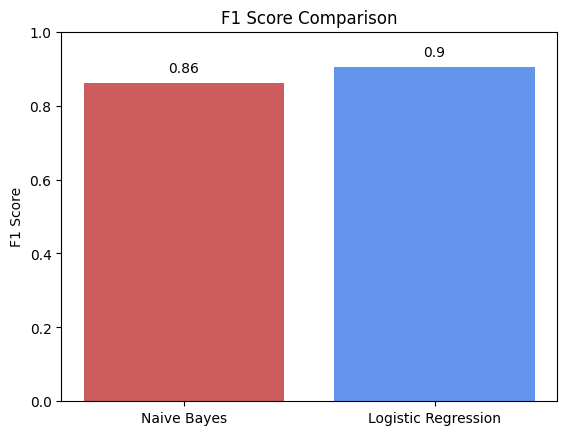

In [ ]:
import matplotlib.pyplot as plt

models = ['Naive Bayes', 'Logistic Regression']
f1_scores = [nb_f1_score, lr_f1_score]
colors = ['indianred', 'cornflowerblue']

# Create bar chart
bars = plt.bar(models, f1_scores, color=colors)
plt.ylim([0, 1])
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison')

# Add text labels above bars
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, round(f1_scores[i], 2), ha='center', va='bottom')

plt.show()

Logistic Regression is performing better than Naive Bayes because:


*   Logistic Regression is more complex and can capture more intricate relationships between the input features and the target variable
*   Naive Bayes considers all input features to be independant of each other which might not be true

*   Logistic Regression assigns weights to input features through which importance can be determined. Naive Bayes treats all features equally






## Preparing embedding layer

In [ ]:
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X_train)

X_train_glove = word_tokenizer.texts_to_sequences(X_train)
X_test_glove = word_tokenizer.texts_to_sequences(X_test)

In [ ]:
# Adding 1 to store dimensions for words for which no pretrained word embeddings exist

vocab_length = len(word_tokenizer.word_index) + 1
vocab_length  #number of unique words

92547

In [ ]:
# Padding all comment sentences to fixed length 100

maxlen = 100

X_train_glove = pad_sequences(X_train_glove, padding='post', maxlen=maxlen)
X_test_glove = pad_sequences(X_test_glove, padding='post', maxlen=maxlen)

In [ ]:
# Load GloVe word embeddings and create an Embeddings Dictionary

from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [ ]:
# Create Embedding Matrix having 100 columns 
# Containing 100-dimensional GloVe word embeddings for all unique words in our corpus.

embedding_matrix = zeros((vocab_length, 100))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

##Training with LSTM

In [ ]:
# Defining Model Architecture

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)

model.add(embedding_layer)
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Model Compiling

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          9254700   
                                                                 
 lstm_1 (LSTM)               (None, 64)                42240     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9,297,005
Trainable params: 42,305
Non-trainable params: 9,254,700
_________________________________________________________________
None


In [ ]:
# Model Training

model_history = model.fit(X_train_glove, Y_train, batch_size=64, epochs=50, verbose=1, validation_split=0.1)

Epoch 1/50
563/563 [==============================] - 70s 121ms/step - loss: 0.5353 - acc: 0.7304 - val_loss: 0.4426 - val_acc: 0.7955
Epoch 2/50
563/563 [==============================] - 62s 109ms/step - loss: 0.4245 - acc: 0.8040 - val_loss: 0.4606 - val_acc: 0.7850
Epoch 3/50
563/563 [==============================] - 64s 114ms/step - loss: 0.3837 - acc: 0.8289 - val_loss: 0.3749 - val_acc: 0.8298
Epoch 4/50
563/563 [==============================] - 62s 110ms/step - loss: 0.3532 - acc: 0.8443 - val_loss: 0.3527 - val_acc: 0.8405
Epoch 5/50
563/563 [==============================] - 62s 111ms/step - loss: 0.3310 - acc: 0.8542 - val_loss: 0.3482 - val_acc: 0.8415
Epoch 6/50
563/563 [==============================] - 64s 114ms/step - loss: 0.3133 - acc: 0.8641 - val_loss: 0.3336 - val_acc: 0.8497
Epoch 7/50
563/563 [==============================] - 62s 111ms/step - loss: 0.3021 - acc: 0.8699 - val_loss: 0.3366 - val_acc: 0.8540
Epoch 8/50
563/563 [==============================] - 6

In [ ]:
# Predictions on the Test Set

score = model.evaluate(X_test_glove, Y_test, verbose=1)

313/313 [==============================] - 6s 19ms/step - loss: 0.8087 - acc: 0.8398


In [ ]:
# Model Performance

from sklearn.metrics import confusion_matrix, classification_report
import sys
import numpy as np

Y_pred = model.predict(X_test_glove)
Y_pred = Y_pred.flatten()
Y_pred = np.where(Y_pred > 0.5, 1, 0)

lstm_f1_score = f1_score(Y_test, Y_pred)
print("F1 Score using LSTM:", lstm_f1_score)

313/313 [==============================] - 8s 23ms/step
F1 Score using LSTM: 0.8419494869771114


## Comparision between Naive Bayes, Logistic Regression and LSTM

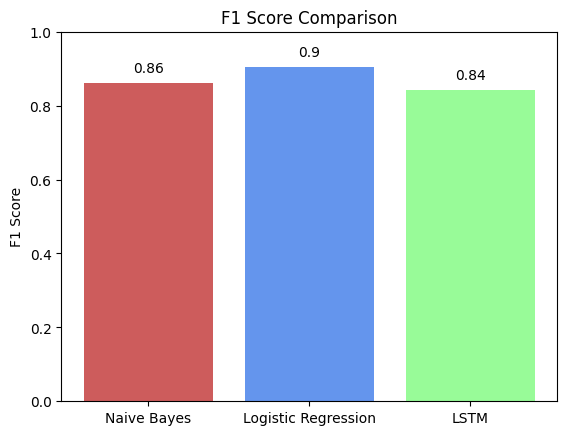

In [ ]:
import matplotlib.pyplot as plt

models = ['Naive Bayes', 'Logistic Regression', 'LSTM']
f1_scores = [nb_f1_score, lr_f1_score, lstm_f1_score]
colors = ['indianred', 'cornflowerblue', 'palegreen']

# Create bar chart
bars = plt.bar(models, f1_scores, color=colors)
plt.ylim([0, 1])
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison')

# Add text labels above bars
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, round(f1_scores[i], 2), ha='center', va='bottom')

plt.show()